In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('toronto_geo.csv')

In [3]:
X = df[['Latitude', 'Longitude']]

I choose to divide the city in 4 regions (clusters): N, S, E , W

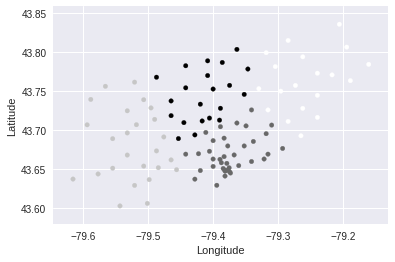

In [4]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)

df.plot(kind='scatter', x='Longitude', y='Latitude', c=clusters)

In [5]:
clusters = pd.Series(clusters)
clusters = clusters.map({0: 'red', 1:'blue', 2:'orange', 3:'green'})
clusters = clusters.to_list()

In [6]:
map_toronto = folium.Map(location=[43.653908,-79.384293], zoom_start=10)

for lat, lng, borough, neighborhood, cluster in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood'], clusters):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=cluster,
        fill=True,
        fill_color=cluster,
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

In [7]:
map_toronto